In [2]:
import numpy as np

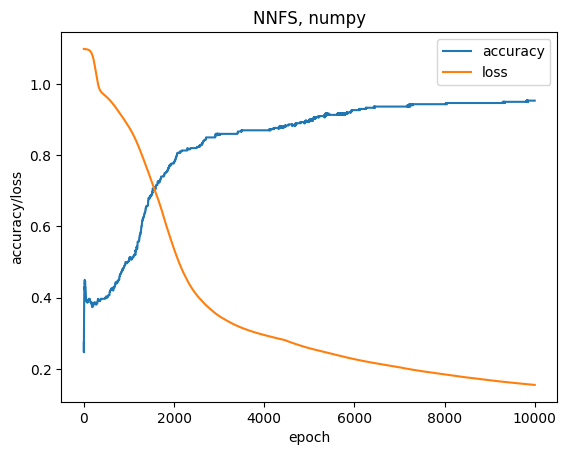

In [3]:
from lib.datasets import spiral_data
from lib.dense_layer import Layer_Dense
from lib.activations import Activation_ReLU
from lib.combo import Activation_Softmax_Loss_CategoricalCrossentropy
from lib.optimizers import Optimizer_SGD
import json

#  Load dataset
with open('./spiral.json') as f:
    sp = json.load(f)
X = np.array(sp['X'])
y = np.array(sp['y'])

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output # of previous layer here) and 3 output values
dense2 = Layer_Dense(64, 3)
# Create Softmax+ Categorical cross-entropy
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD(learning_rate=0.2)

output = []

for epoch in range(10001):
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  loss = loss_activation.forward(dense2.output, y)
  predictions = np.argmax(loss_activation.output, axis=1)
  if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
  accuracy = np.mean(predictions==y)
  # if not epoch % 100:
  output.append([epoch, accuracy, loss])

  loss_activation.backward(loss_activation.output, y)
  dense2.backward(loss_activation.d_inputs)
  activation1.backward(dense2.d_inputs)
  dense1.backward(activation1.d_inputs)

  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  
# display output as a plot, showing accuracy and loss as a function of epoch as blue and orange lines, respectively
import matplotlib.pyplot as plt
plt.title('NNFS, numpy')
plt.plot(np.array(output)[:,0], np.array(output)[:,1])
plt.plot(np.array(output)[:,0], np.array(output)[:,2])
plt.legend(['accuracy', 'loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.show()



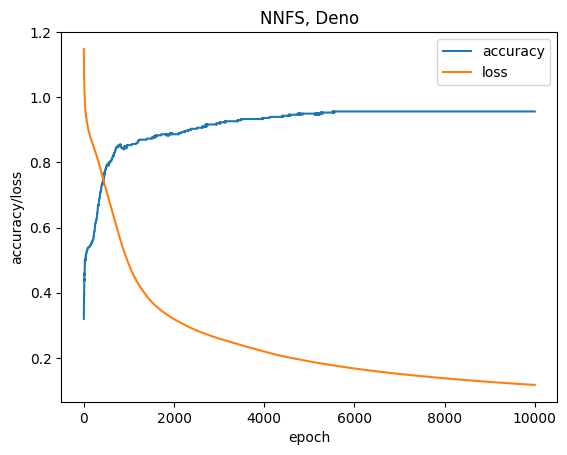

In [4]:
# read ./deno-out.json
import json
# create `./deno-out.json` with `deno run mod.ts > ../nn-from-scratch-py/deno-out.json` 
# in `nn-from-scratch-deno`
with open('./deno-out.json') as f:
    out = json.load(f)

plt.title('NNFS, Deno')
plt.plot(np.array(out)[:,0], np.array(out)[:,1])
plt.plot(np.array(out)[:,0], np.array(out)[:,2])
plt.legend(['accuracy', 'loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.show()

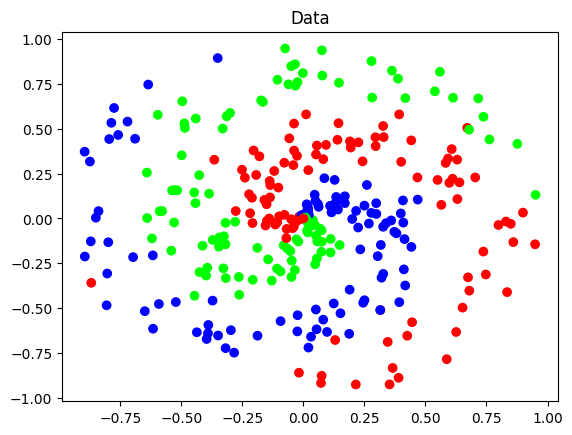

In [34]:
with open('./spiral.json') as f:
    sp = json.load(f)
X = np.array(sp['X'])
y = np.array(sp['y'])

plt.title('Data')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()